In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_weather=pd.read_csv("/content/drive/MyDrive/PYTHONassignments/aesthetix_assignment/weather_data.csv",parse_dates=['day'])
type(df_weather.day[0])
print(df_weather)

         day  temperature  windspeed   event
0 2017-01-01         32.0        6.0    Rain
1 2017-01-04          NaN        9.0   Sunny
2 2017-01-05         28.0        NaN    Snow
3 2017-01-06          NaN        7.0     NaN
4 2017-01-07         32.0        NaN    Rain
5 2017-01-08          NaN        NaN   Sunny
6 2017-01-09          NaN        NaN     NaN
7 2017-01-10         34.0        8.0  Cloudy
8 2017-01-11         40.0       12.0   Sunny


In [5]:
df_weather.shape

(9, 4)

In [6]:
df_weather.set_index('day',inplace=True)
df_weather

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [7]:
df_weather.isnull().sum()

temperature    4
windspeed      4
event          2
dtype: int64

In [8]:
new_df=df_weather.fillna(0)
print(new_df)

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          0.0        9.0   Sunny
2017-01-05         28.0        0.0    Snow
2017-01-06          0.0        7.0       0
2017-01-07         32.0        0.0    Rain
2017-01-08          0.0        0.0   Sunny
2017-01-09          0.0        0.0       0
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


In [23]:
(new_df['windspeed'].fillna(0))   #wrong
print(new_df)

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          0.0        9.0   Sunny
2017-01-05         28.0        0.0    Snow
2017-01-06          0.0        7.0       0
2017-01-07         32.0        0.0    Rain
2017-01-08          0.0        0.0   Sunny
2017-01-09          0.0        0.0       0
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


In [26]:
new_df=df_weather.fillna({
       'temperature': 0,
       'windspeed': 0,
       'event':'no event'
})
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [28]:
new_df=df_weather.fillna(method="ffill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [31]:
new_df=df_weather.fillna({
       'temperature': df_weather['temperature'].mean(),
       'windspeed': df_weather['windspeed'].median(),
       'event':df_weather['event']
})
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,33.2,9.0,Sunny
2017-01-05,28.0,8.0,Snow
2017-01-06,33.2,7.0,NaN
2017-01-07,32.0,8.0,Rain
2017-01-08,33.2,8.0,Sunny
2017-01-09,33.2,8.0,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


#repetition

In [32]:
new_df=df_weather.fillna(method="ffill",limit=1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [34]:
new_df=df_weather.interpolate()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [37]:
new_df=df_weather.dropna(how='all')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


##new weather

In [38]:
df=pd.read_csv("/content/drive/MyDrive/PYTHONassignments/aesthetix_assignment/weather_data (1).csv")

In [42]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [43]:
import numpy as np

In [46]:
new_df=df.replace(-99999, value=0)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,0,7,0
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


### BILLIONAIRES

In [47]:
df_forbes=pd.read_csv("/content/forbes_2640_billionaires.csv")

In [48]:
df_forbes.head()

,rank,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,...,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
1,2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,...,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
2,3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,...,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
3,4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,...,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
4,5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,...,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1


In [50]:
df_forbes.shape

(2640, 23)

In [51]:
df_forbes.isnull().sum()

rank                     0
name                     0
forbes_id                0
net_worth                0
age                     65
age_range                0
country                  0
source                   0
industry                 0
Age                     85
Source of Wealth         1
Self-Made Score       2082
Philanthropy Score    2229
Residence               59
Citizenship             11
Marital Status         551
Children              1042
Education             1225
Bachelor              1224
Master                1224
Doctorate             1224
Drop Out              1224
Self Made                0
dtype: int64

In [53]:
df_forbes.describe

<bound method NDFrame.describe of       rank                      name             forbes_id  net_worth   age  \
0        1  Bernard Arnault & family       bernard-arnault      211.0  74.0   
1        2                 Elon Musk             elon-musk      180.0  51.0   
2        3                Jeff Bezos            jeff-bezos      114.0  59.0   
3        4             Larry Ellison         larry-ellison      107.0  78.0   
4        5            Warren Buffett        warren-buffett      106.0  92.0   
...    ...                       ...                   ...        ...   ...   
2635  2540                   Yu Rong               yu-rong        1.0  51.0   
2636  2540    Richard Yuengling, Jr.  richard-yuengling-jr        1.0  80.0   
2637  2540             Zhang Gongyun         zhang-gongyun        1.0  60.0   
2638  2540    Zhang Guiping & family         zhang-guiping        1.0  71.0   
2639  2540               Inigo Zobel           inigo-zobel        1.0  66.0   

      age_range  

In [54]:
df_forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                2640 non-null   int64  
 1   name                2640 non-null   object 
 2   forbes_id           2640 non-null   object 
 3   net_worth           2640 non-null   float64
 4   age                 2575 non-null   float64
 5   age_range           2640 non-null   int64  
 6   country             2640 non-null   object 
 7   source              2640 non-null   object 
 8   industry            2640 non-null   object 
 9   Age                 2555 non-null   float64
 10  Source of Wealth    2639 non-null   object 
 11  Self-Made Score     558 non-null    float64
 12  Philanthropy Score  411 non-null    float64
 13  Residence           2581 non-null   object 
 14  Citizenship         2629 non-null   object 
 15  Marital Status      2089 non-null   object 
 16  Childr

In [61]:
df_forbes['country'].nunique()

77

In [60]:
df_forbes['country'].value_counts()

United States           735
China                   494
India                   169
Germany                 126
Russia                  104
                       ... 
Belize                    1
Eswatini (Swaziland)      1
Venezuela                 1
Algeria                   1
Panama                    1
Name: country, Length: 77, dtype: int64

Text(0.5, 1.0, 'Countriess')

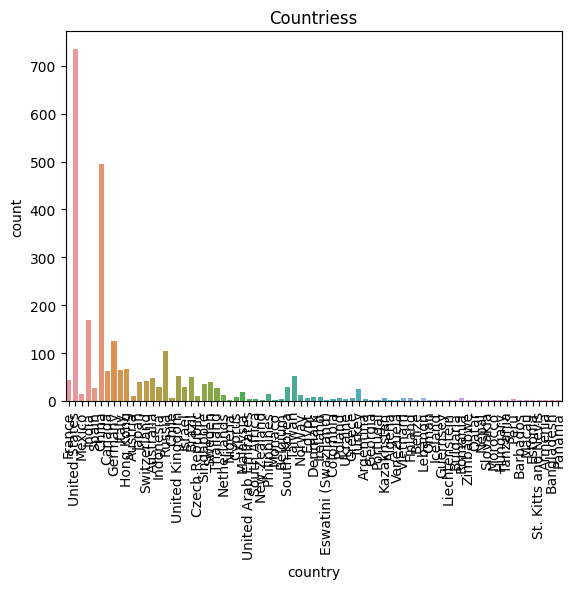

In [65]:
sns.countplot(x='country',data=df_forbes)
plt.xticks(rotation=90)
plt.title("Countriess")

In [64]:
count=df_forbes['country'].value_counts()
print(count)

United States           735
China                   494
India                   169
Germany                 126
Russia                  104
                       ... 
Belize                    1
Eswatini (Swaziland)      1
Venezuela                 1
Algeria                   1
Panama                    1
Name: country, Length: 77, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

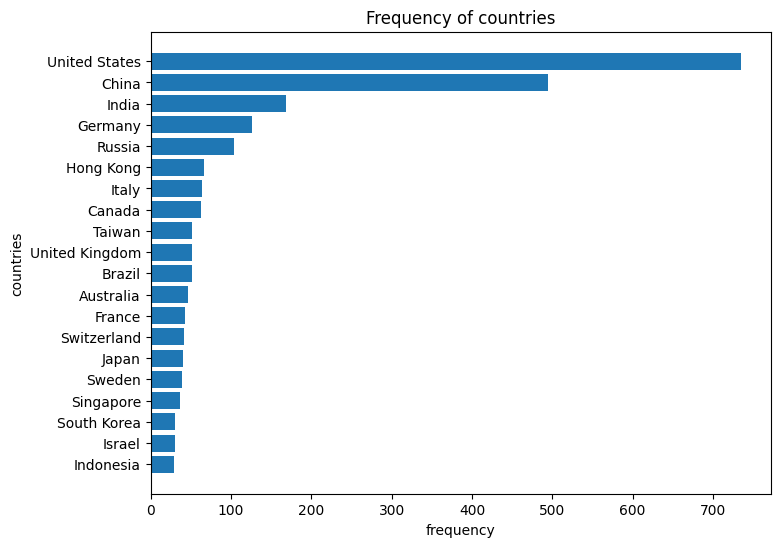

In [66]:
count=count[:20]
count=count[::-1]
plt.figure(figsize=(8,6))

plt.barh(count.index,count.values)

plt.xlabel('frequency')
plt.ylabel('countries')
plt.title('Frequency of countries')
plt.show

### shopping_trends

In [67]:
df_shop=pd.read_csv("/content/shopping_trends.csv")

In [68]:
df_shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [69]:
df_shop.shape

(3900, 19)

In [70]:
df_shop.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

In [71]:
df_shop.describe

<bound method NDFrame.describe of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2          

### piechart

gender

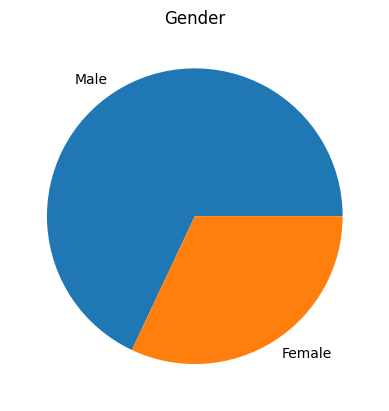

In [72]:
plt.pie(df_shop['Gender'].value_counts(),labels=df_shop['Gender'].unique())
plt.title('Gender')
plt.show()

payment method

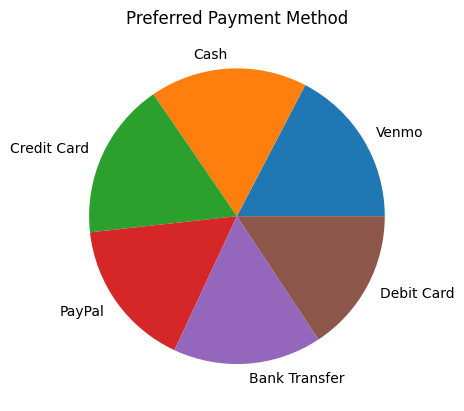

In [73]:
plt.pie(df_shop['Preferred Payment Method'].value_counts(),labels=df_shop['Preferred Payment Method'].unique())
plt.title('Preferred Payment Method')
plt.show()

Text(0.5, 1.0, 'Location')

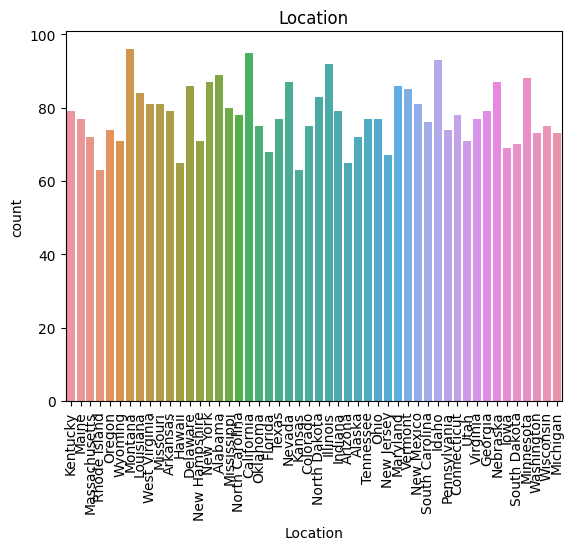

In [74]:
sns.countplot(x='Location',data=df_shop)
plt.xticks(rotation=90)
plt.title("Location")